# Lab 3: Linear Regression

## Task 1. Mystery Data 1

### 1a) Import the data

1. Import data 'data/mystery_data_1.csv' (using your data class or [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html))
2. Print first 10 lines rows of data.

#### 1b) Using the following links and MatPlotLib documentation to view the data:
- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib hist](https://matplotlib.org/gallery/statistics/hist.html)
1. Create a figure with 3 subplots
    1. One scatterplot with column X on the x-axis and column Y on the y-axis.
    1. Two historgrams one for the X data and the other for the Y data.
    2. Create the histograms with 10 bins.
    3. Include a title for each subplot.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams["figure.figsize"] = [12,4.5]

mystery_data_1 = np.genfromtxt("data/mystery_data_1.csv", delimiter= ',', skip_header = 2)
print(mystery_data_1[0:10,:])


print('''
-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------
''')

[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]

-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------



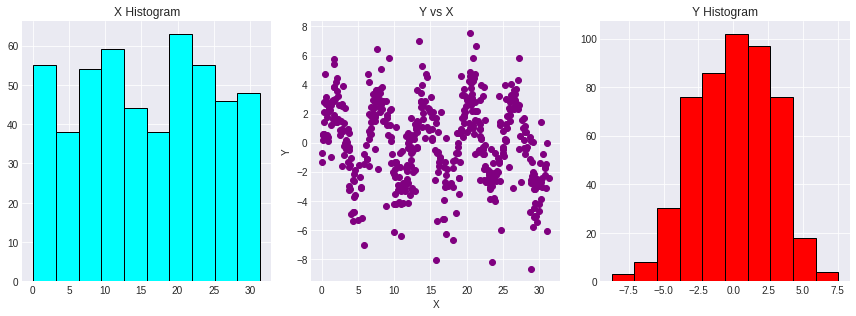

In [58]:
#1B Create a figure with 3 subplots
# One scatterplot with column X on the x-axis and column Y on the y-axis.
# Two historgrams one for the X data and the other for the Y data.
# Create the histograms with 10 bins.
# Include a title for each subplot.

fig , axs = plt.subplots(nrows = 1, ncols = 3, tight_layout = True)
fig.tight_layout(pad=5.0)
x = mystery_data_1[:,0].reshape(mystery_data_1.shape[0],1)
y = mystery_data_1[:,1].reshape(mystery_data_1.shape[0],1)

axs[0].hist(x,color = 'cyan', bins = 10, edgecolor = 'black')
axs[0].set_title('X Histogram')
axs[1].scatter(x,y,color = 'purple')
axs[1].set_title('Y vs X')
axs[1].set_ylabel('Y')
axs[1].set_xlabel('X')
axs[2].hist(y,color = 'red', bins = 10, edgecolor = 'black')
axs[2].set_title('Y Histogram')
plt.show()

## Task 2. Analyze Mystery Data 1

### 2a) Use scipy to calculate the linear regression for Mystery Data 1 

1. Print first 10 lines rows of data.
2. Calculate the linear regression [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)
    1. The x column is the left hand side array and the y column is the right hand side array.
    2. This includes adding homogeneous coordinates (for the intercept) to the A matrix. 
    3. Useful methods: [hstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html), [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) and [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)
3. Print the least-squares solution and residual
4. Using the residual, calculate and print the $R^2$ value
    1. $R^2 = 1 - \frac{residues}{smd}$
    2. The square mean deviation: $smd = \sum (y - \frac{\sum y}{n} )^2$

In [3]:
print(mystery_data_1[0:10,:])

[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]


In [10]:
A = np.hstack((mystery_data_1[:,0].reshape(mystery_data_1.shape[0],1),np.ones((mystery_data_1.shape[0],1))))
y = mystery_data_1[:,1].reshape(mystery_data_1.shape[0],1)
print(M[0:4,:])

[[ 9.185  1.   ]
 [29.323  1.   ]
 [26.767  1.   ]
 [17.792  1.   ]]


In [28]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
c, res, rnk, s = scipy.linalg.lstsq(M, y)

r2 = 1-(res/(sum((y - y.mean())**2)))
print(f"c: {c[:,0]}\n\nresiduals:  {res[0]:.13f}\n\nr2: {r2[0]:.13F}")
print('''
-----------------------------------
Your results should look like this:
----------------------------------- 
c: [-0.05650709  0.92884793]

residuals: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------
''')

c: [-0.05650709  0.92884793]

residuals:  3722.8001542015754

r2: 0.0338244114866

-----------------------------------
Your results should look like this:
----------------------------------- 
c: [-0.05650709  0.92884793]

residuals: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------



### 2b) Visualize linear regression results with matplotlib

1. Plot a scatterplot of the mystery data X on the x axis and Y on the y axis
2. Plot a line representing the linear regression
    1. For line_x, use [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to create 100 points from the min x value to the max x value
    2. For line_y, multiply line_x by the slope (first weight) and add the intercept (second weight)
3. Include a title (with $R^2$ value), legend, x label and y label

In [66]:
line_x = np.linspace(x.min(),x.max(),100)
line_y = (line_x*c[0])+c[1]
print(line_y)

[ 0.9246099   0.90673425  0.8888586   0.87098296  0.85310731  0.83523166
  0.81735601  0.79948036  0.78160471  0.76372907  0.74585342  0.72797777
  0.71010212  0.69222647  0.67435082  0.65647518  0.63859953  0.62072388
  0.60284823  0.58497258  0.56709693  0.54922129  0.53134564  0.51346999
  0.49559434  0.47771869  0.45984304  0.4419674   0.42409175  0.4062161
  0.38834045  0.3704648   0.35258915  0.33471351  0.31683786  0.29896221
  0.28108656  0.26321091  0.24533526  0.22745962  0.20958397  0.19170832
  0.17383267  0.15595702  0.13808137  0.12020573  0.10233008  0.08445443
  0.06657878  0.04870313  0.03082748  0.01295184 -0.00492381 -0.02279946
 -0.04067511 -0.05855076 -0.07642641 -0.09430205 -0.1121777  -0.13005335
 -0.147929   -0.16580465 -0.1836803  -0.20155594 -0.21943159 -0.23730724
 -0.25518289 -0.27305854 -0.29093418 -0.30880983 -0.32668548 -0.34456113
 -0.36243678 -0.38031243 -0.39818807 -0.41606372 -0.43393937 -0.45181502
 -0.46969067 -0.48756632 -0.50544196 -0.52331761 -0.

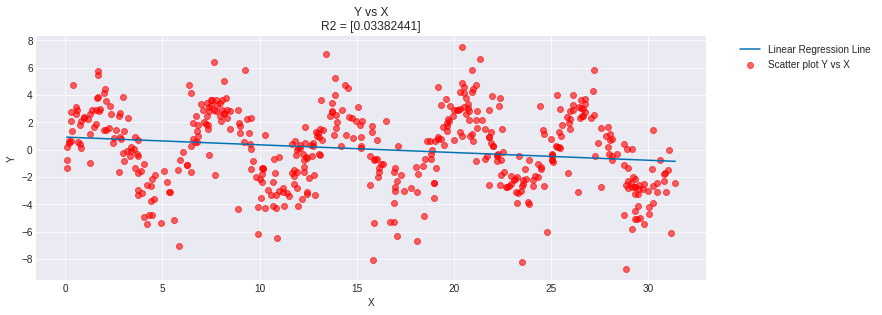

In [77]:
plt.scatter(x,y,color = 'red', label = 'Scatter plot Y vs X', alpha = 0.6)
plt.plot(line_x,line_y,label = 'Linear Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Y vs X\nR2 = {r2}')
plt.legend(bbox_to_anchor = (1.26,1),loc = 'upper right')
plt.show()

### 2c)  Interpret the results of the linear regression of the dataset 

Interpret the results based on your plot and $R^2$ value. Is the linear regression model a good model for the data? Why?

The R2 value is low at 0.03382441 I fould say this is not a good model for the data because looking at the scatter plot for the data is is clearly a sinusoidal relationship (looks like a sin function oscilates)